# Computing slope of series with Pandas and SciPy

In this tutorial, you'll learn how to compute the slope of a `Series` with Pandas and SciPy.

Not a trading tutorial per se, but it's a helper function that exists in my personal fintech library that I developed for myself.

Provide examples of when computing slope of series is useful in a fintech context:

- Positive/negative trend of price action (e.g., is the price going up or down)
- Analyzing fundamental data (e.g., are net/gross profit margins improving?)

We'll be using it in our Part 7 of this series for market stage detection.

This tutorial is part 6 in a larger series on getting started with fintech and market analysis with Python:

1. How to download market data with yfinance and Python
2. My preferred MultiIndex DataFrame structure for stock market data
3. How to plot candlestick charts with Python and mplfinance
4. How to compute Simple Moving Averages (SMAs) for trading with Python and Pandas
5. Finding consecutive integer groups in arrays with Python and NumPy
6. _Computing slope of series with Pandas and SciPy (this tutorial)_
7. Market stage detection with Python and Pandas
8. Implementing TradingView’s Stochastic RSI indicator in Python
9. Introduction to position sizing
10. Risk/Reward analysis and position sizing with Python

## Configuring your development environment

- Before we dive in, let’s set up our Python environment with the packages we’ll need:

In [1]:
# install the required python packages
# !pip install numpy scipy pandas yfinance matplotlib mplfinance

- One bullet point for each package, explaining what it does

## Implemeting our method to compute slope of series

In [2]:
# import the necessary packages
from datetime import datetime
from scipy import stats
import mplfinance as mpf
import yfinance as yf
import pandas as pd
import numpy as np

- Explain imports
- Implement `calculate_slope` method:

In [3]:
def calculate_slope(series: pd.Series) -> float:
    # check to see if less than two points were provided
    if len(series) < 2:
        # return NaN since slope cannot be computed
        return np.nan

    # check to see if performing linear regression would cause a division by
    # zero error, including (2) *any* of the data points in the series being
    # NaN, or (2) *all* values in the series being equal
    if series.isna().any() or np.all(series == series.iloc[0]):
        # return NaN
        return np.nan
    
    # compute and return the slope for the input data points
    return stats.linregress(np.arange(0, len(series)), series).slope

- Input value should be Pandas `Series` object and output value will be the computed slope
- Need at least two points to compute slope
- Check if there are any Nan values in series, or all values in series are equal, which would result in a divison by zero error
- Compute slope using `SciPy` and the `stats.lingress` function which performs linear regression
- Return slope of series

## Computing slope of series with Pandas and SciPy

- We'll demo the `calculate_slope` function by computing the slope of a stock prices

### Positive slope

In [4]:
# define the ticker we are interested in
ticker = "CLS"

# set the start and end date of history requests
end_date = datetime(year=2025, month=1, day=22)
start_date = datetime(year=2024, month=10, day=1)

- Set ticker
- Set start and end date of requests

In [5]:
# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

- Download market data with `yfinance`
    - Link back to Hugo `ref` article: `how-to-download-market-data-yfinance-python`

In [6]:
# compute the slope of the series
slope = calculate_slope(df[ticker]["Close"])
slope

np.float64(0.7419833146132432)

- Compute slope of ticker prices
- Notice how the slope is positive, implying price is _increasing_

In [7]:
# compute the start and end price based on the value of our slope
start_price = df[ticker]["Close"].iloc[0]
end_price = start_price + (slope * (len(df) - 1))

- Compute the start and end price based on the slope

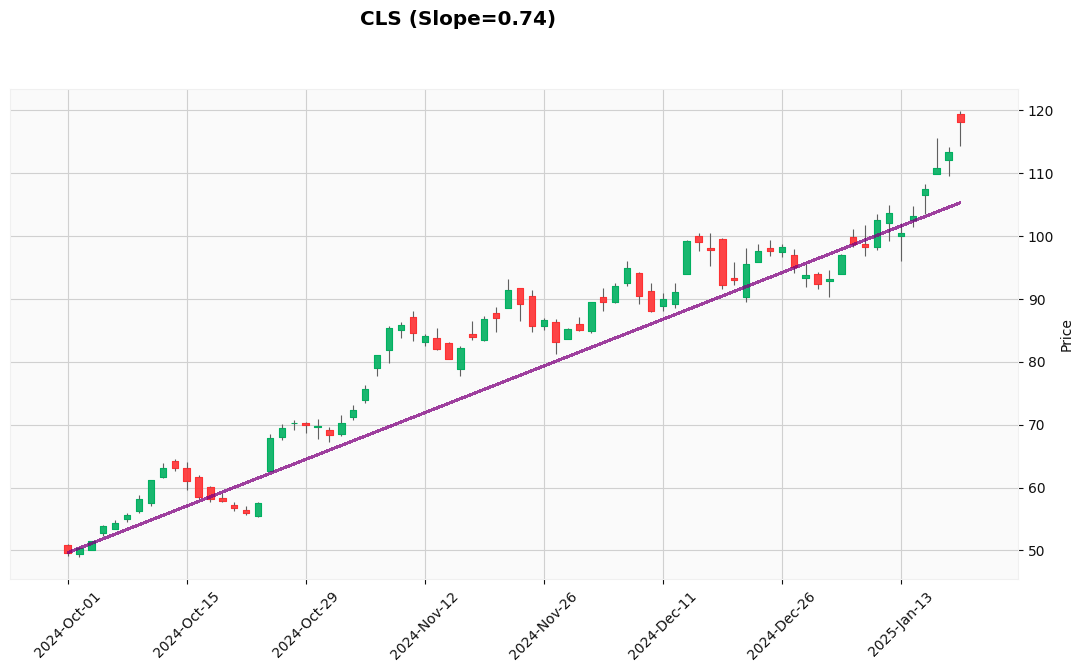

In [8]:
# plot the OHLCV bars, along with the slope
mpf.plot(
    df[ticker],
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} (Slope={slope:0.2f})",
    alines=dict(
        alines=[(df.index[0], start_price), (df.index[-1], end_price)],
        colors=["purple"],
        linewidths=1.5,
        alpha=0.75
    )
)

- Plot candlesticks along with the slope line (purple)
- One bullet point per parameter to `mpf.plot`
    - Exception being `alines`
    - Create a new set of bullet points to explain these values and what they control

### Negative slope

- Now let's look at an example of the price of a ticker going down
- NVDA has struggled in early 2025, let's use them

In [9]:
# define the ticker we are interested in
ticker = "NVDA"

# set the start and end date of history requests
end_date = datetime(year=2025, month=3, day=10)
start_date = datetime(year=2025, month=2, day=15)

- Set ticker, start date, and end date

In [10]:
# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)

- Fetch OHLCV data for NVDA

In [11]:
# compute the slope of the series
slope = calculate_slope(df[ticker]["Close"])
slope

np.float64(-2.404878654060783)

- Compute slope
- Note how the slope is negative

In [12]:
# compute the start and end price based on the value of our slope
start_price = df[ticker]["Close"].iloc[0]
end_price = start_price + (slope * (len(df) - 1))

- Again, derive start and end price based on slope

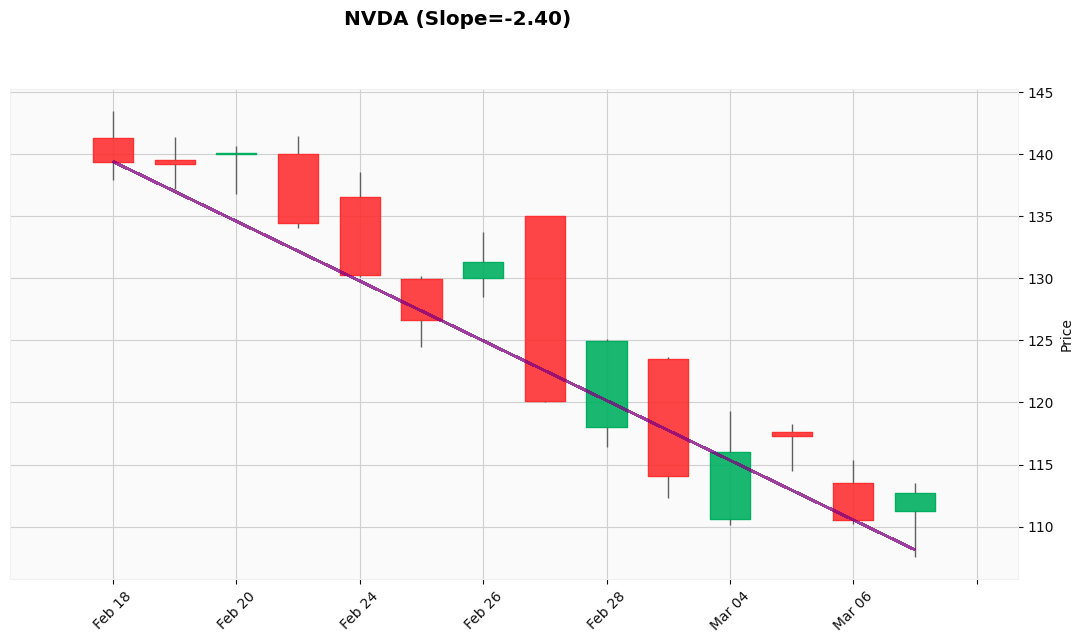

In [13]:
# plot the OHLCV bars, along with the slope
mpf.plot(
    df[ticker],
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} (Slope={slope:0.2f})",
    alines=dict(
        alines=[(df.index[0], start_price), (df.index[-1], end_price)],
        colors=["purple"],
        linewidths=1.5,
        alpha=0.75
    )
)

- Plot candlesticks and slope (purple)
- Note that the price is decreasing along with the slope

## Where else can slope calculation be used in fintech applications?

- Provide bulleted list of examples in fintech where we would compute slope of series

## Exercises

- Give user simple exercises they can do to extend their knowledge gained from this tutorial

## Final thoughts

- Summarize this article
- Final sentence should be "In the next tutorial, we'll..."

## Download the source code to this tutorial

Use the following:

```
<a class=optin-code-trigger href=#optin>👉 Click here to download the source code to this tutorial</a>
```